In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree

In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#drop useless columns
#since cabin has too many nulls, we need to delete it
#Also drop passenger_id, ticket, name, and embarked since logically they are useless in prediction
#Fare is related to class, so we delete it
titanic = titanic.drop(["Cabin","PassengerId","Ticket","Name","Embarked","Fare"],axis=1)

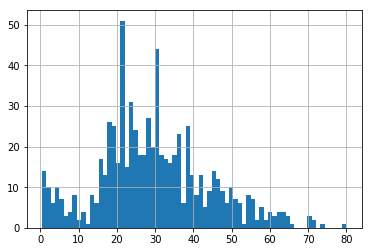

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


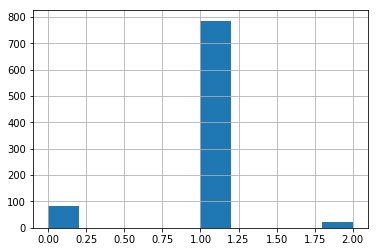

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Age_new     891 non-null int32
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.3+ KB


In [11]:
#Age
#Logically, when accidents occur, we normally give priority to children and old people. 
#Therefore, I divide age into 3 groups:(,16),(16,60),(60,) to represent child, adult and old
#since most passengers are adults, we fill nulls with adult
#0:child;1:adult,2:old
titanic['Age'].dropna().hist(bins=70)
plt.show()

titanic['Age_new'] = 1
titanic['Age_new'][titanic["Age"]<16] = 0
titanic['Age_new'][titanic["Age"]>60] = 2
titanic['Age_new']=titanic['Age_new'].astype(int)
titanic['Age_new'].hist()
plt.show()        
titanic.info()


In [13]:
#Family


# Instead of having two columns Parch & SibSp, 
# we can have only one column to represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic['Family'] =  titanic["Parch"] + titanic["SibSp"]
titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0
# drop Parch & SibSp
titanic = titanic.drop(['SibSp','Parch'], axis=1)


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
#gender
#male is 1
titanic['Gender'] = 0
titanic['Gender'][titanic['Sex']=="male"] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
#final data preparation
titanic_y = titanic['Survived']
titanic_x = titanic.drop(['Survived','Age',"Sex"],axis=1)

titanic_y.head()
titanic_x.head()


,Pclass,Age_new,Family,Gender
0,3,1,1,1
1,1,1,1,0
2,3,1,0,0
3,1,1,1,0
4,3,1,0,1


In [16]:
#decision tree model
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(titanic_x, titanic_y)

print(model_tree.feature_importances_)
print(model_tree.score(titanic_x, titanic_y))


[0.24949133 0.08455378 0.01735779 0.6485971 ]
0.8159371492704826


In [18]:
#predict
a = model_tree.predict(titanic_x)

titanic_x["Survived"] = a
test_data = titanic_x
test_data.head()

,Pclass,Age_new,Family,Gender,Survived
0,3,1,1,1,0
1,1,1,1,0,1
2,3,1,0,0,1
3,1,1,1,0,1
4,3,1,0,1,0
